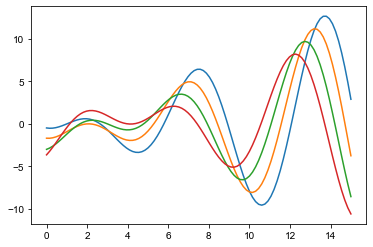

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
x = np.linspace(0,15,100)
for i in range(1, 5): 
      plt.plot(x, np.sin(x+i/2) * (x-i))
sb.set_style('whitegrid',{'axes.grid': False}) #Darkgrid;Whitegrid;Dark;White;Ticks
#sb.despine() #removes border we can say
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb # https://seaborn.pydata.org/generated/seaborn.pairplot.html
iris = pd.read_csv('D:\Data_Practice\iris.csv')
print(iris.head())
print(iris.shape)
print(iris.columns)
print(iris['Species'].value_counts()) #It filters data and gives you distinct items and count of that

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
(150, 5)
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


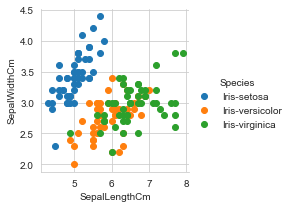

In [4]:
#iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',legend=True) #just plots with same color SL Vs Sw
sb.set_style('whitegrid')
g=sb.FacetGrid(iris,hue='Species')
g=g.map(plt.scatter,'SepalLengthCm','SepalWidthCm')
g.add_legend()
plt.show()

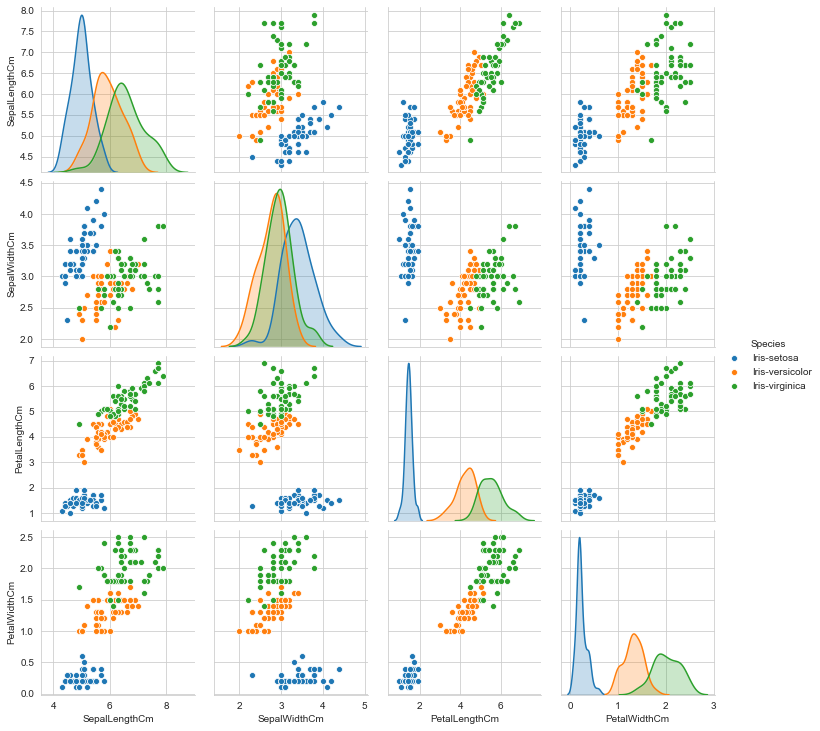

In [5]:
#Pairplots
#iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',legend=True) #just plots with same color SL Vs Sw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.close()
iris = pd.read_csv('D:\Data_Practice\iris.csv')
sb.set_style('whitegrid')
sb.pairplot(iris,hue='Species')
#g.map(plt.scatter,'SepalLengthCm','SepalWidthCm')
plt.show() #refer notes

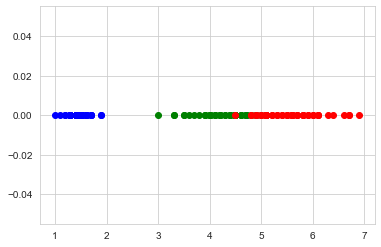

In [16]:
#Histogram -1D (Only one feature Vs Zeros)
Setosa = iris[iris["Species"] == 'Iris-setosa'] #This says in iris df a col Species is thr and whenever it's value is Iris-Setosa(50) , take those values(all sl sw pl pw) and store in a var called Setosa
Vers   = iris[iris["Species"] == 'Iris-versicolor'] #Same as above
Vir    = iris[iris["Species"] == 'Iris-virginica'] #Same as above
#print(Setosa)
#print(iris["Species"] == 'Iris-setosa')
plt.plot(Setosa["PetalLengthCm"],np.zeros(len(Setosa["PetalLengthCm"])),'bo') #y=np.arange(0,50) for to scatter dots along Y
plt.plot(Vers["PetalLengthCm"],np.zeros_like(Vers["PetalLengthCm"]),'go')
plt.plot(Vir["PetalLengthCm"],np.zeros_like(Vir["PetalLengthCm"]),'ro')
plt.show() #You can see a graph sticking to X and we cant diff also dots 

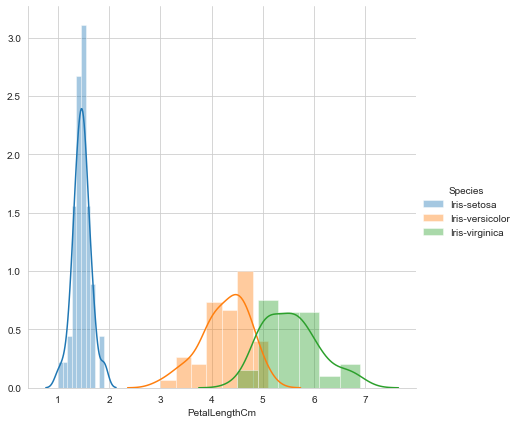

In [13]:
#Histogram - with PDF - https://pythonbasics.org/seaborn-distplot/
g = sb.FacetGrid(iris,hue='Species',height=6)
g = g.map(sb.distplot,'PetalLengthCm') #
g.add_legend()
plt.show() #Gives you HG with PDF (Curve) on it

In [17]:
Setosa = iris[iris["Species"] == 'Iris-setosa']
#iris['Petal Length'] = iris['PetalLengthCm']
#iris.drop('Petal Length',axis=1,inplace=True)
print(iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


[ 6  0 28  7  0  0  7  0  1  1]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]


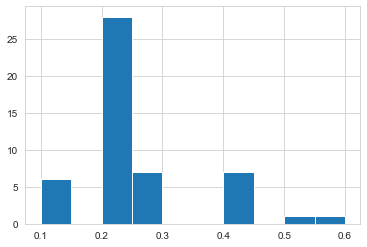

In [18]:
counts, bin_edges = np.histogram(Setosa['PetalWidthCm'], bins=10) #bins-->[1. 1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9]
print(counts)
print(bin_edges)
plt.hist(Setosa['PetalWidthCm'],bins=10)
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


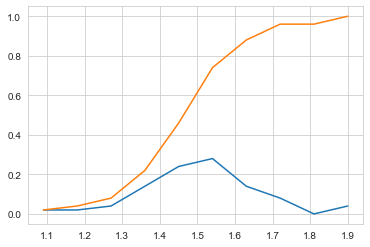

In [22]:
counts, bin_edges = np.histogram(Setosa['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
print(pdf) #[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0. 0.04] --> 20% flws in 1 to 1.09, 40% flws in 1.18 to 1.27 ... 
cdf = np.cumsum(pdf)
print(cdf) #Cumulative sum--> [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.]
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [26]:
counts, bin_edges = np.histogram(Setosa['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
print(counts)
print(pdf) #[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0. 0.04] --> 20% flws in 1 to 1.09, 40% flws in 1.18 to 1.27 ... 
cdf = np.cumsum(pdf)
print(cdf) #Cumulative sum--> [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.]

[ 1  1  2  7 12 14  7  4  0  2]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


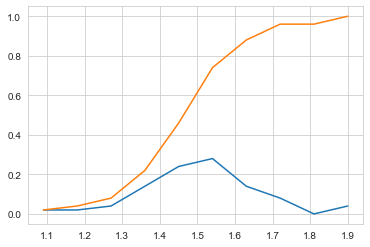

In [27]:
#plotting cdf and pdf
plt.plot(bin_edges[1:],pdf) #bin_edges start with 1.09 to equal axes as b_e contains 11 values whereas cdf pdf 10 only
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[0.02 0.06 0.12 0.16 0.32 0.46 0.58 0.78 0.92 1.  ]


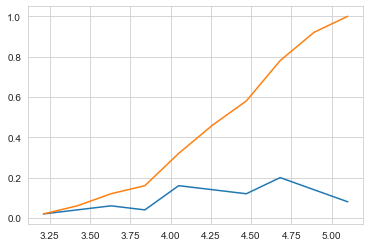

In [28]:
#Same for Vers
counts, bin_edges = np.histogram(Vers['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]


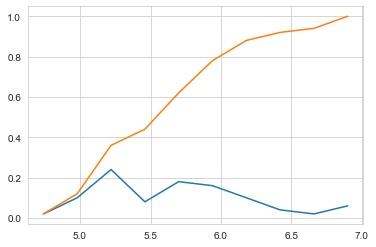

In [29]:
#Same for Vir
counts, bin_edges = np.histogram(Vir['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[0.02 0.06 0.12 0.16 0.32 0.46 0.58 0.78 0.92 1.  ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]


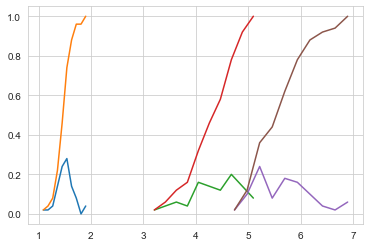

In [9]:
counts, bin_edges = np.histogram(Setosa['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(Vers['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(Vir['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [18]:
#Mean, Variance, Std_Dev ...
#mean without outlier -->
print(np.mean(Setosa.PetalLengthCm)) #Setosa['PetalLengthCm'] we can write or Setosa.PetalLengthCm (name should not contain spaces to use dot(.) ex:petal length XXX)
#mean with outlier -->
print(np.mean(np.append(Setosa['PetalLengthCm'],50))) #2.4156862745098038 mean chnged drastically coz of one huge outlier

1.464
2.4156862745098038


In [16]:
std_dev = np.std(Setosa.PetalLengthCm)
var = std_dev**2
print(std_dev) #Standard Deviation --> sqrt(Variance) gives spread of the flower
print(var) #Variance 
#Var and std_dev also gets affected by outliers

0.17176728442867115
0.029504000000000013


In [19]:
#median --> equivalent to mean doesn't get affected by outliers like mean
#Without outlier --> 1.5
print(np.median(Setosa.PetalLengthCm)) #Setosa['PetalLengthCm'] we can write or Setosa.PetalLengthCm (name should not contain spaces to use dot(.) ex:petal length XXX)
#with outlier --> 1.5
print(np.median(np.append(Setosa['PetalLengthCm'],50)))
#Median doesnt chng coz of outlier or chnges slightly
#median gets impact when more than half of the values are outliers... 

1.5
1.5


In [25]:
# Percentiles and Quantiles
print(np.percentile(Setosa.PetalLengthCm,90)) #90th percentile
print(np.percentile(Setosa.PetalLengthCm,np.arange(0,100,25))) #0th,25th,50th and 75th percentiles --> Quantiles...
#Importance of these --> refer notes

1.7
[1.    1.4   1.5   1.575]


In [29]:
#MAD & IQR
# for explanation refer notes
from statsmodels import robust
print(robust.mad(Setosa['PetalLengthCm'])) #0.14826022185056031 slightly equal to std
#IQR - 75th per - 25th per
seventyfifth_per = np.percentile(Setosa.PetalLengthCm,75)
twentyfifth_per = np.percentile(Setosa.PetalLengthCm,25)
iqr = seventyfifth_per - twentyfifth_per
print(iqr) #0.17500000000000027 --> 50% pts in this range(75-20)

0.14826022185056031
0.17500000000000027


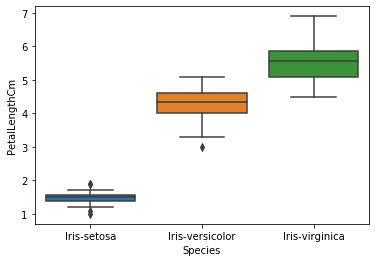

In [30]:
#Box-Plot
sb.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.show()# we can see 25th 50th 75th percentiles
#for more explanation refer notes
#top bottom lines are called whiskers

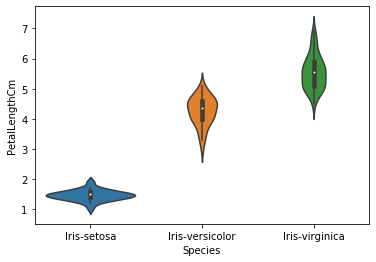

In [31]:
sb.violinplot(x='Species',y='PetalLengthCm',data=iris) #Mix of histogram and boxplot
plt.show()
#Refer notes for explanation

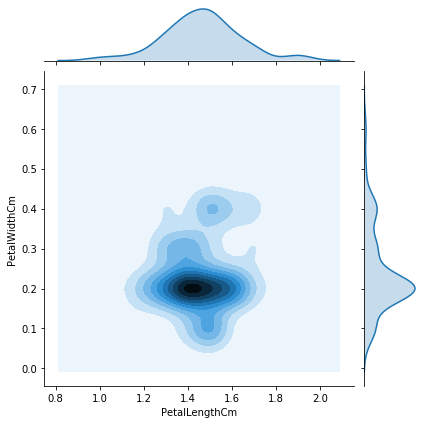

In [35]:
#Multivariate Analysis
sb.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=Setosa, kind="kde");
plt.show(); #Contour plot
# Refer notes for explanation